In [50]:
import re
import pandas as pd
import seaborn as sns
import spacy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing

In [51]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [52]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [53]:
dataframe = pd.read_csv('base/baseia.csv', sep=';', header=0)
dataframe

,descricao_abertura,descricao
0,Cliente solicitou a alteração de plano.,RENOVAÇÃO FIDELIDADE
1,CLIENTE SEM CONEXAO,2. SEM ACESSO - RESIDENCIAL
2,ENTREI EM CONTATO COM O(A) CLIENTE PARA SABER ...,2. SEM CONTATO COM O CLIENTE
3,Cliente informa ter efetuado o pagamento,1.2 AGENDAMENTO DA FATURA
4,SEM ACESSO- 21/01-MANHÃ.SEM COVID.,2. SEM ACESSO - RESIDENCIAL
...,...,...
353433,Adesão de comodato com fidelidade de 12 meses ...,3. INSTALAÇÃO FIBRA - RESIDENCIAL
353434,cliente vai cancelar pois o mesmo contratou co...,4. CANCELAMENTO
353435,VENDEDOR EXTERNO******* INSTALAR FTTH ONU COMO...,3. INSTALAÇÃO FIBRA - RESIDENCIAL
353436,"VALOR TOTAL DOS DÉBITOS: 1.223,98. EQUIPAMENTO...",1.3 CARTA EXTRAJUDICIAL


In [54]:
dataframe.descricao.unique()

array(['RENOVAÇÃO FIDELIDADE', '2. SEM ACESSO - RESIDENCIAL',
       '2. SEM CONTATO COM O CLIENTE', '1.2  AGENDAMENTO DA FATURA',
       '1.1 COBRANÇA', '1.3 RETIRADA COMPULSORIA',
       '1.2 DÚVIDAS/INFORMAÇÕES GERAIS (FINANCEIRO)',
       '1.2 ENVIO DE COMPROVANTE', '4. CANCELAMENTO',
       '1.2 RETIRADA DE BOLETO (PRESENCIAL)', '1.2 ENVIO DE BOLETO',
       'MIGRAÇÃO DE PLANO', '1.2 RECEBIMENTO DE MENSALIDADE (PRESENCIAL)',
       '2. TROCA DE SENHA WIFI', '1.3 NEGATIVAÇÃO', 'UPGRADE',
       '1.3 EXCLUSÃO NEGATIVAÇÃO', '2. LOS - RESIDENCIAL',
       '2. INSTALAÇÃO DE ROTEADOR ADICIONAL EM COMODATO',
       '2. LENTIDÃO/OSCILAÇÕES NA INTERNET - RESIDENCIAL', '1.1  ACORDO',
       '3. INSTALAÇÃO FIBRA - RESIDENCIAL', '1.2 DESBLOQUEIO',
       '2. DÚVIDAS/INFORMAÇÕES GERAIS', '3. PÓS-VENDA', 'DOWNGRADE',
       '4. SOLICITAÇÃO DE CANCELAMENTO',
       '2. RETIRADA DE ROTEADOR ADICIONAL EM COMODATO',
       'MUDANÇA DE ENDEREÇO - RESIDENCIAL', 'DESPROVISIONAMENTO',
       'MIGRAÇÃO 

In [55]:
tipo = dataframe.descricao.value_counts() > 300
dataframe = dataframe[dataframe['descricao'].isin(tipo[tipo == True].index)]
dataframe.descricao.unique()

array(['RENOVAÇÃO FIDELIDADE', '2. SEM ACESSO - RESIDENCIAL',
       '2. SEM CONTATO COM O CLIENTE', '1.2  AGENDAMENTO DA FATURA',
       '1.1 COBRANÇA', '1.3 RETIRADA COMPULSORIA',
       '1.2 DÚVIDAS/INFORMAÇÕES GERAIS (FINANCEIRO)',
       '1.2 ENVIO DE COMPROVANTE', '4. CANCELAMENTO',
       '1.2 RETIRADA DE BOLETO (PRESENCIAL)', '1.2 ENVIO DE BOLETO',
       'MIGRAÇÃO DE PLANO', '1.2 RECEBIMENTO DE MENSALIDADE (PRESENCIAL)',
       '2. TROCA DE SENHA WIFI', '1.3 NEGATIVAÇÃO', 'UPGRADE',
       '1.3 EXCLUSÃO NEGATIVAÇÃO', '2. LOS - RESIDENCIAL',
       '2. INSTALAÇÃO DE ROTEADOR ADICIONAL EM COMODATO',
       '2. LENTIDÃO/OSCILAÇÕES NA INTERNET - RESIDENCIAL', '1.1  ACORDO',
       '3. INSTALAÇÃO FIBRA - RESIDENCIAL', '1.2 DESBLOQUEIO',
       '2. DÚVIDAS/INFORMAÇÕES GERAIS', '3. PÓS-VENDA', 'DOWNGRADE',
       '4. SOLICITAÇÃO DE CANCELAMENTO',
       'MUDANÇA DE ENDEREÇO - RESIDENCIAL', 'DESPROVISIONAMENTO',
       'MIGRAÇÃO DE TECNOLOGIA', '1.3 CARTA EXTRAJUDICIAL',
       'RETOR

In [56]:
novodataframe = pd.DataFrame(columns=['descricao_abertura', 'descricao'])
for descricao in dataframe.descricao.unique():
        df = dataframe.query('descricao == "{}"'.format(descricao)).head(300)
        novodataframe = novodataframe.append(df)
listaDescricao = list(novodataframe.descricao.unique())

# for i in range(0, (len(listaDescricao))):
#     novodataframe['descricao'][novodataframe['descricao'] == listaDescricao[i]] = i
# novodataframe


C:\Users\usuario\AppData\Local\Temp\ipykernel_18392\488866001.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  novodataframe = novodataframe.append(df)
C:\Users\usuario\AppData\Local\Temp\ipykernel_18392\488866001.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  novodataframe = novodataframe.append(df)
C:\Users\usuario\AppData\Local\Temp\ipykernel_18392\488866001.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  novodataframe = novodataframe.append(df)
C:\Users\usuario\AppData\Local\Temp\ipykernel_18392\488866001.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  novodataframe = novodataframe.append(df)
C:\Users\usuario\AppData

c:\Users\usuario\Documents\Python\ia-pln-atendimento\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


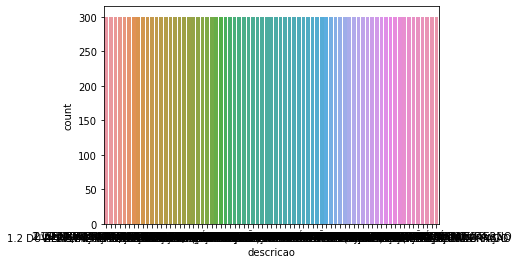

In [57]:
sns.countplot(novodataframe.descricao);

In [58]:
X = novodataframe.iloc[:, 0].values
type(X)

numpy.ndarray

In [59]:
X.shape

(21900,)

In [60]:
y = novodataframe.iloc[:, 1].values
le = preprocessing.LabelEncoder()
print(y)
y = le.fit_transform(y)
print(y)

['RENOVAÇÃO FIDELIDADE' 'RENOVAÇÃO FIDELIDADE' 'RENOVAÇÃO FIDELIDADE' ...
 '7. TAXA DE SERVIÇO EXTERNO ' '7. TAXA DE SERVIÇO EXTERNO '
 '7. TAXA DE SERVIÇO EXTERNO ']
[66 66 66 ... 55 55 55]


In [61]:
y.shape

(21900,)

In [62]:
X,_,y,_ = train_test_split(X, y, test_size=0.85, stratify=y)

In [63]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.lower()

In [64]:
texto = 'Cliente relata que no momento esta sem conexão, assim que  restabelecer o sinal a conexão cai novamente a mesma relata queda constante. A mesma informa que pessoal da HD informou que o problema e no conector, o mesmo está com remendo.\nTelefone:(62) 93837298  (62)99884926.\n\nCliente está com muitas quedas no PPPoE, informa que quando meche no cabo que conecta equipamentos sua conexão cai e volta novamente.'
novo_texto = clean_text(texto)
novo_texto

'cliente relata que no momento esta sem conex o assim que restabelecer o sinal a conex o cai novamente a mesma relata queda constante a mesma informa que pessoal da hd informou que o problema e no conector o mesmo est com remendo telefone cliente est com muitas quedas no pppoe informa que quando meche no cabo que conecta equipamentos sua conex o cai e volta novamente '

In [65]:
nlp = sp.load('pt_core_news_sm')

In [66]:
stop_words = sp.lang.pt.STOP_WORDS

In [67]:
def clean_text2(text):
    document = nlp(text)
    words = [token.text for token in document]
    words = [word for word in words if word not in stop_words]
    words = ' '.join([str(element) for element in words])
    return words

In [68]:
novo_texto2 = clean_text2(novo_texto)
novo_texto2

'cliente relata conex restabelecer sinal conex cai novamente mesma relata queda constante mesma informa pessoal hd informou problema conector est remendo telefone cliente est muitas quedas pppoe informa meche cabo conecta equipamentos conex cai volta novamente'

In [69]:
data_labels = y

In [70]:
np.unique(data_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [71]:
data_clean = [clean_text2(clean_text(text)) for text in X]

TOKENIZAÇÃO

In [72]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [73]:
tokenizer.vocab_size

4084

In [74]:
data_inputs = [tokenizer.encode(text) for text in data_clean]

PREENCHIMENTO - PADDING

In [75]:
max_len = max([len(s) for s in data_inputs])
max_len

109

In [76]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs, value=0, maxlen=max_len, padding='post')

DIVISAO DA BASE DE DADOS EM TREINAMENTO E TESTE

In [77]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs, data_labels, test_size=0.3, stratify=data_labels)

In [78]:
train_inputs.shape

(2299, 109)

In [79]:
train_labels.shape

(2299,)

In [80]:
test_labels.shape

(986,)

In [81]:
test_inputs.shape

(986, 109)

CONSTRUÇÃO DO MODELO

In [82]:
class DCNN(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim=128,filter=50,ffn_units=512, num_classes=2, dropout_rate=0.1,training=False,name='DCNN'):
        super(DCNN, self).__init__(name=name)
        
        self.embedding = layers.Embedding(vocab_size, embedding_dim)
        self.bigram = layers.Conv1D(
            filter, 2, padding='same', activation='relu')
        self.trigram = layers.Conv1D(
            filter, 3, padding='same', activation='relu')
        self.fourgram = layers.Conv1D(
            filter, 4, padding='same', activation='relu')
        self.pool = layers.GlobalMaxPool1D()
        self.dense_1 = layers.Dense(ffn_units, activation='relu')
        self.droput = layers.Dropout(dropout_rate)
        if num_classes == 2:
            self.last_dense = layers.Dense(1, activation='sigmoid')
        else:
            self.last_dense = layers.Dense(num_classes,activation='softmax')
    
    def call(self, inputs, training):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)
        
        merged = tf.concat([x_1, x_2, x_3], axis=-1)
        merged = self.dense_1(merged)
        merged = self.droput(merged,training)
        outupt = self.last_dense(merged)
        
        return outupt
        

TREINAMENTO

In [83]:
vocab_size =tokenizer.vocab_size
vocab_size

4084

In [84]:
emb_dim = 200
nb_filters =100
ff_units = 100
batch_size = 64
num_classes = len(set(train_labels))
dropout_rate = 0.2
np_epochs = 10

In [85]:
Dcnn = DCNN(vocab_size, embedding_dim=emb_dim, filter=nb_filters, ffn_units=ff_units, num_classes=num_classes, dropout_rate=dropout_rate)

In [86]:
if num_classes == 2:
    Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
    Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
# checkpoint = "base/"
# ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
# ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint, max_to_keep=5)
# if ckpt_manager.latest_checkpoint:
#     ckpt.restore(ckpt_manager.latest_checkpoint)
#     print('Latest checkpoint restored!!')

In [88]:
history = Dcnn.fit(train_inputs, train_labels,batch_size=batch_size, epochs=np_epochs, validation_split=0.10, verbose=1)
#ckpt_manager.save()

Epoch 1/10
33/33 [==============================] - 5s 126ms/step - loss: 4.2454 - accuracy: 0.0764 - val_loss: 4.1764 - val_accuracy: 0.2087
Epoch 2/10
33/33 [==============================] - 4s 121ms/step - loss: 3.9944 - accuracy: 0.2209 - val_loss: 3.8580 - val_accuracy: 0.2826
Epoch 3/10
33/33 [==============================] - 4s 123ms/step - loss: 3.4023 - accuracy: 0.3548 - val_loss: 3.0892 - val_accuracy: 0.4217
Epoch 4/10
33/33 [==============================] - 4s 123ms/step - loss: 2.5539 - accuracy: 0.4959 - val_loss: 2.2679 - val_accuracy: 0.5652
Epoch 5/10
33/33 [==============================] - 4s 119ms/step - loss: 1.8014 - accuracy: 0.6240 - val_loss: 1.8424 - val_accuracy: 0.5957
Epoch 6/10
33/33 [==============================] - 4s 122ms/step - loss: 1.3008 - accuracy: 0.7206 - val_loss: 1.6175 - val_accuracy: 0.6261
Epoch 7/10
33/33 [==============================] - 4s 121ms/step - loss: 0.9467 - accuracy: 0.7946 - val_loss: 1.4944 - val_accuracy: 0.6435
Epoch 

In [89]:
results = Dcnn.evaluate(test_inputs, test_labels,batch_size=batch_size)
print(results)

16/16 [==============================] - 0s 19ms/step - loss: 1.6174 - accuracy: 0.6298
[1.617356300354004, 0.6298174262046814]


In [90]:
y_pred_test = Dcnn.predict(test_inputs)

In [91]:
y_pred_test

array([[9.64863109e-04, 8.77327546e-02, 5.26828825e-01, ...,
        2.99470150e-04, 6.57467637e-04, 2.87664414e-04],
       [9.25753789e-04, 1.40291615e-03, 2.52423040e-03, ...,
        3.95367570e-05, 1.99465052e-04, 1.69521431e-04],
       [1.44518415e-08, 3.25590349e-06, 2.27618443e-06, ...,
        4.66686023e-10, 5.20472998e-10, 4.42342305e-08],
       ...,
       [3.04312538e-03, 2.50571873e-02, 1.13941089e-03, ...,
        1.20063396e-02, 2.01047987e-01, 7.11512053e-04],
       [7.23903781e-07, 1.66942031e-04, 4.42387318e-07, ...,
        4.77703850e-07, 1.14021403e-09, 9.90133286e-01],
       [2.14275096e-05, 9.60906267e-01, 8.79085157e-03, ...,
        7.60011753e-05, 3.55570883e-05, 1.45091399e-04]], dtype=float32)

In [99]:
te = tokenizer.encode('envio de boleto')
te

[107, 3928, 3929, 3860, 226]

In [100]:
s = Dcnn(np.array([te]), training=False).numpy()


0.99999994

In [101]:
Dcnn.predict(np.array([te]))

array([[1.9393038e-02, 6.6854157e-02, 2.5804188e-02, 7.7151763e-03,
        1.6396962e-03, 3.7139906e-03, 4.2825933e-03, 9.5440267e-04,
        2.7913088e-03, 4.7827270e-02, 2.9680347e-02, 5.3010187e-03,
        3.4499931e-01, 9.4994949e-03, 5.5750892e-03, 1.3678089e-01,
        7.0819273e-03, 2.2210386e-03, 1.7640609e-02, 1.1932261e-02,
        1.6511852e-02, 9.6620377e-03, 5.5377102e-03, 6.4900215e-03,
        3.2231065e-03, 2.5005816e-03, 2.9054817e-03, 6.3167438e-03,
        8.6048414e-04, 2.3744332e-03, 1.0914540e-02, 2.5923618e-03,
        2.1968235e-03, 2.2249107e-04, 6.8928365e-04, 6.3943970e-03,
        1.0162520e-03, 8.5502141e-04, 1.1249982e-04, 5.7302183e-03,
        7.5097792e-05, 4.9473642e-04, 2.6880542e-03, 4.0769191e-03,
        2.7505911e-04, 8.3389906e-03, 7.5110834e-04, 1.0105171e-03,
        1.1700625e-03, 8.0369989e-04, 2.8999881e-03, 2.3033954e-03,
        1.6391091e-03, 1.5222605e-03, 8.3427299e-03, 1.1681131e-02,
        4.5429687e-03, 2.7646055e-04, 5.3279563e